# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Agung Kurniawan
- Email: a002ybf021@devacademy.id
- Id Dicoding: A002YBF021

## Persiapan

### Menyiapkan library yang dibutuhkan

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# For multi-class metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
# Fix XGBoost import - make sure to import the class directly
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

import joblib

# Set Seaborn style for plots
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

# For reproducibility
SEED = 42
np.random.seed(SEED)

In [6]:
"""
# Prediksi Dropout Mahasiswa Jaya Jaya Institut

## Latar Belakang
Jaya Jaya Institut adalah institusi pendidikan perguruan tinggi yang berdiri sejak tahun 2000.
Meskipun telah mencetak banyak lulusan dengan reputasi baik, ada banyak siswa yang tidak menyelesaikan pendidikannya (dropout).
Jumlah dropout yang tinggi menjadi masalah besar bagi institusi. Oleh karena itu, Jaya Jaya Institut ingin
mendeteksi secepat mungkin siswa yang berpotensi dropout untuk diberikan bimbingan khusus.

## Tujuan
Membuat model prediksi untuk mengidentifikasi mahasiswa yang berisiko dropout berdasarkan data historis mahasiswa.
"""

# 1. Data Loading and Basic Exploration
print("Loading data...")

# Sample code to load data (uncomment and modify this based on your actual data source)
df = pd.read_csv('data.csv', sep=";")


# Initial data exploration
print("\nData Overview:")
print(f"Shape of the dataset: {df.shape}")
print("\nFirst few rows of the dataset:")
display(df.head())

print("\nData information:")
display(df.info())

print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

Loading data...

Data Overview:
Shape of the dataset: (4424, 37)

First few rows of the dataset:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                       

None


Summary statistics:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000



Missing values per column:


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


### Menyiapkan data yang akan diguankan

## Data Understanding

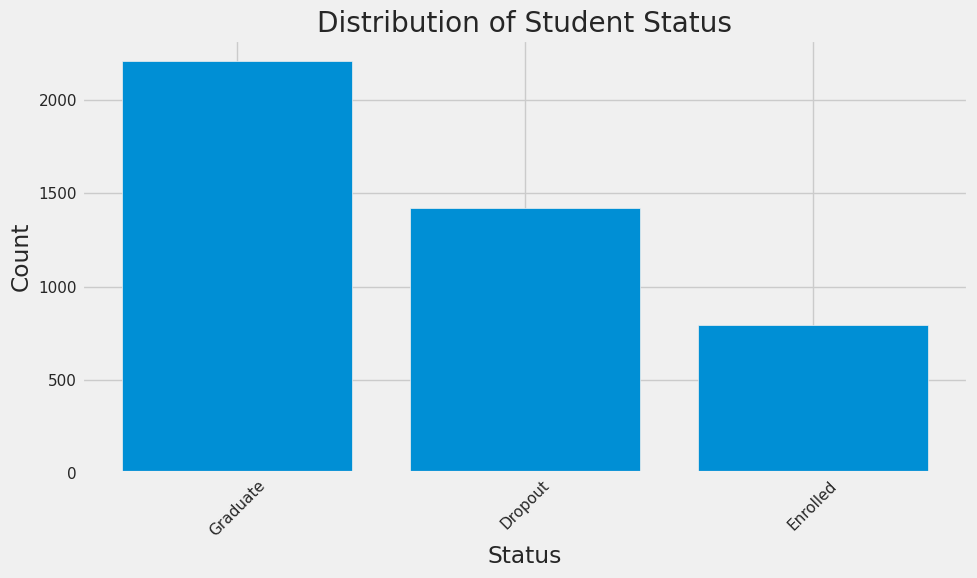


Percentage distribution of target variable:


,proportion
Status,
Graduate,49.93
Dropout,32.12
Enrolled,17.95


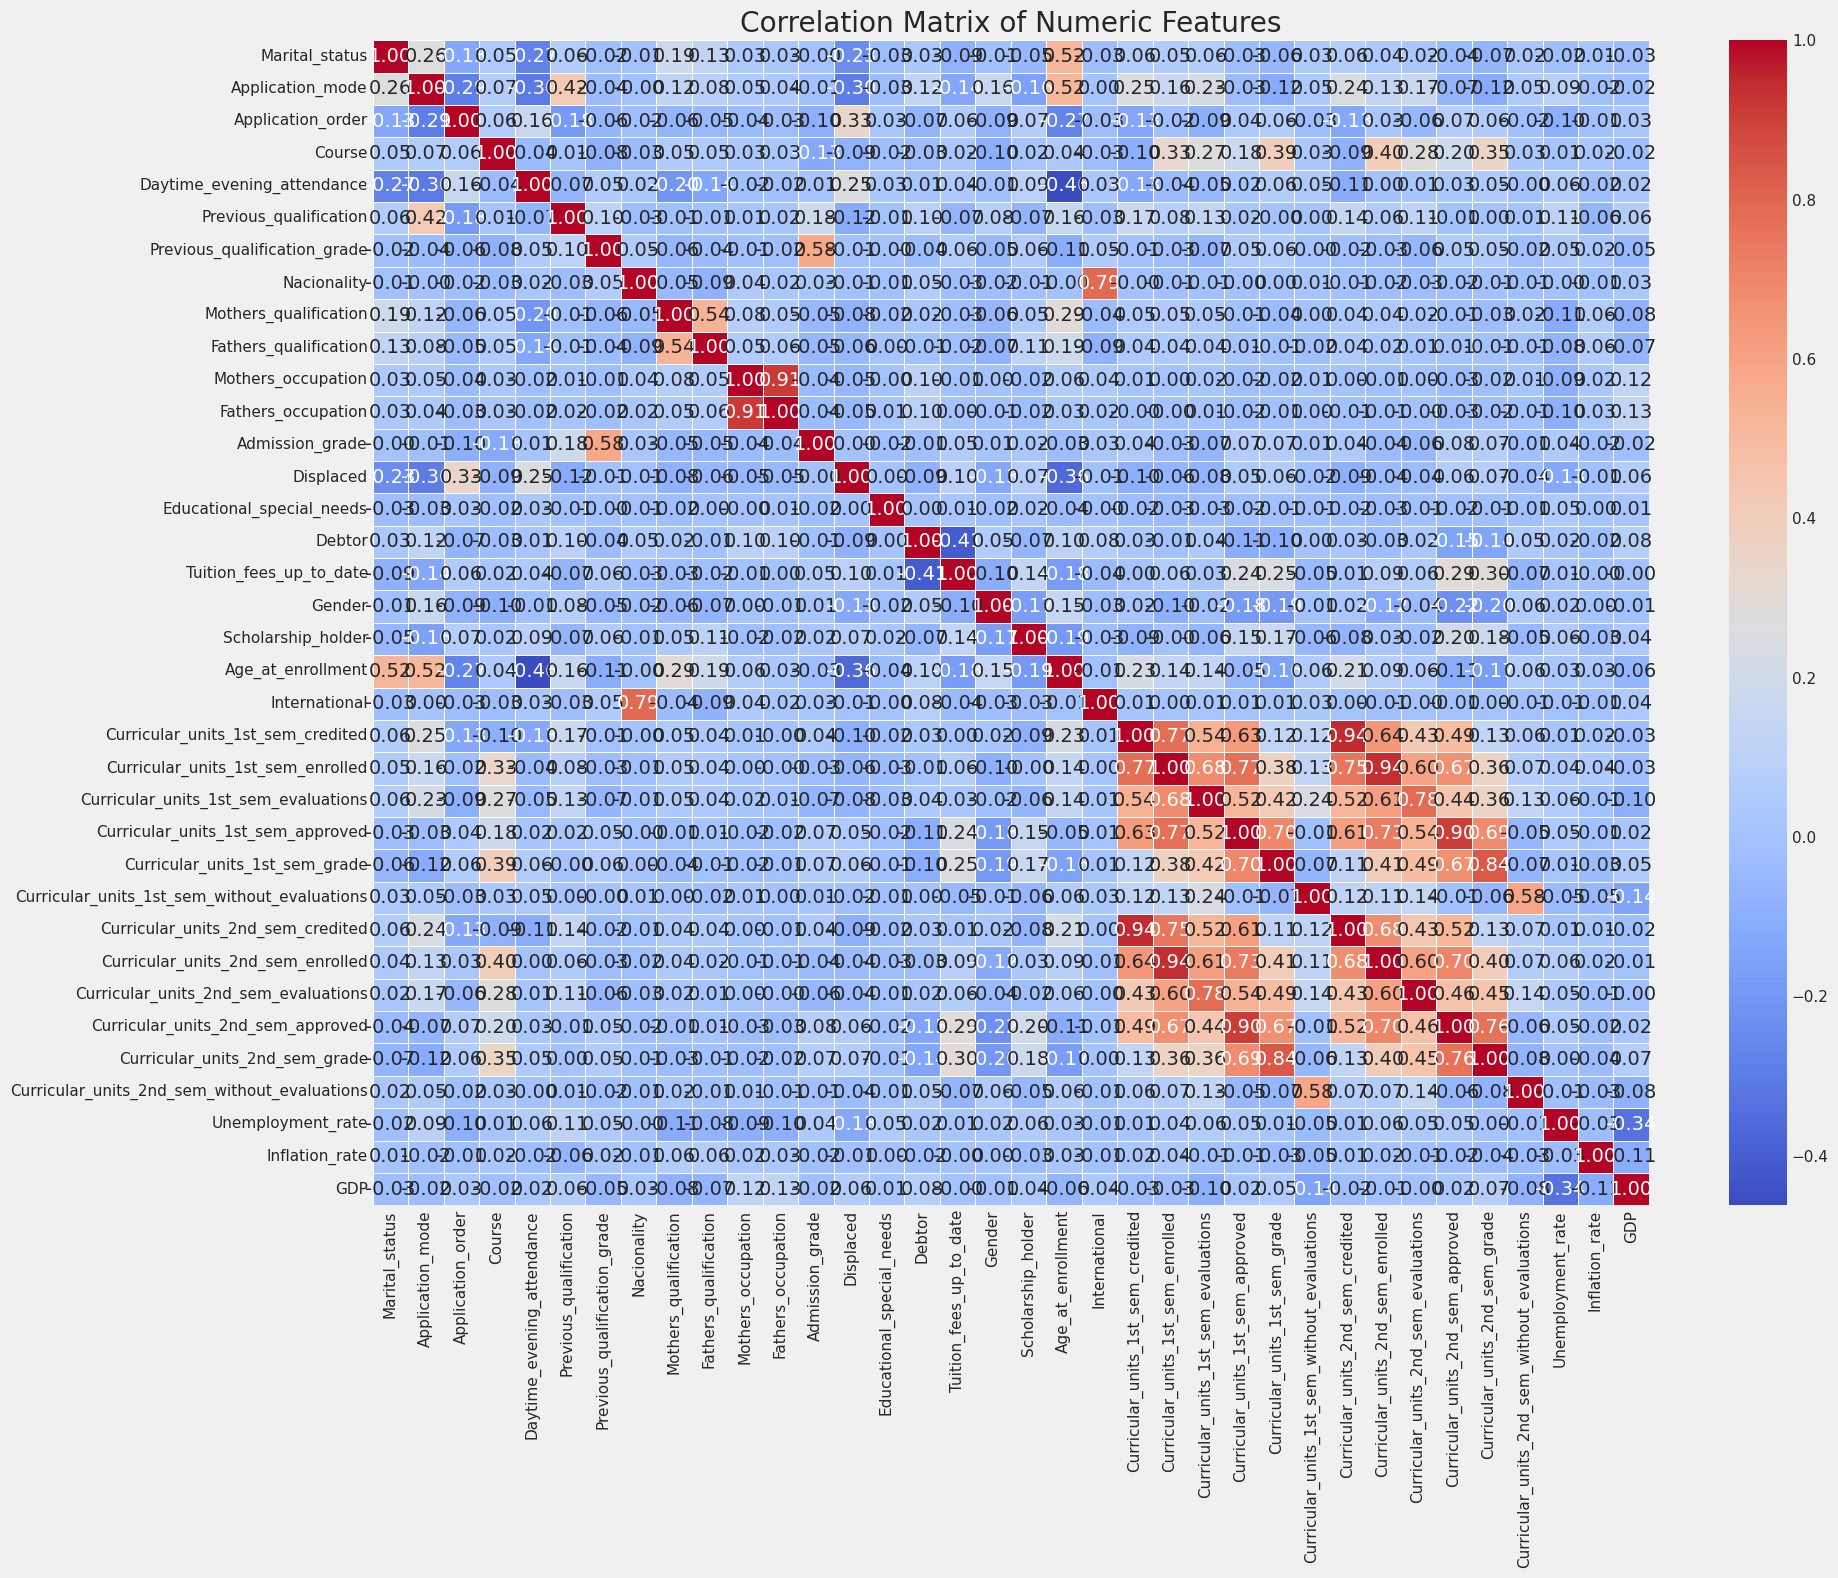

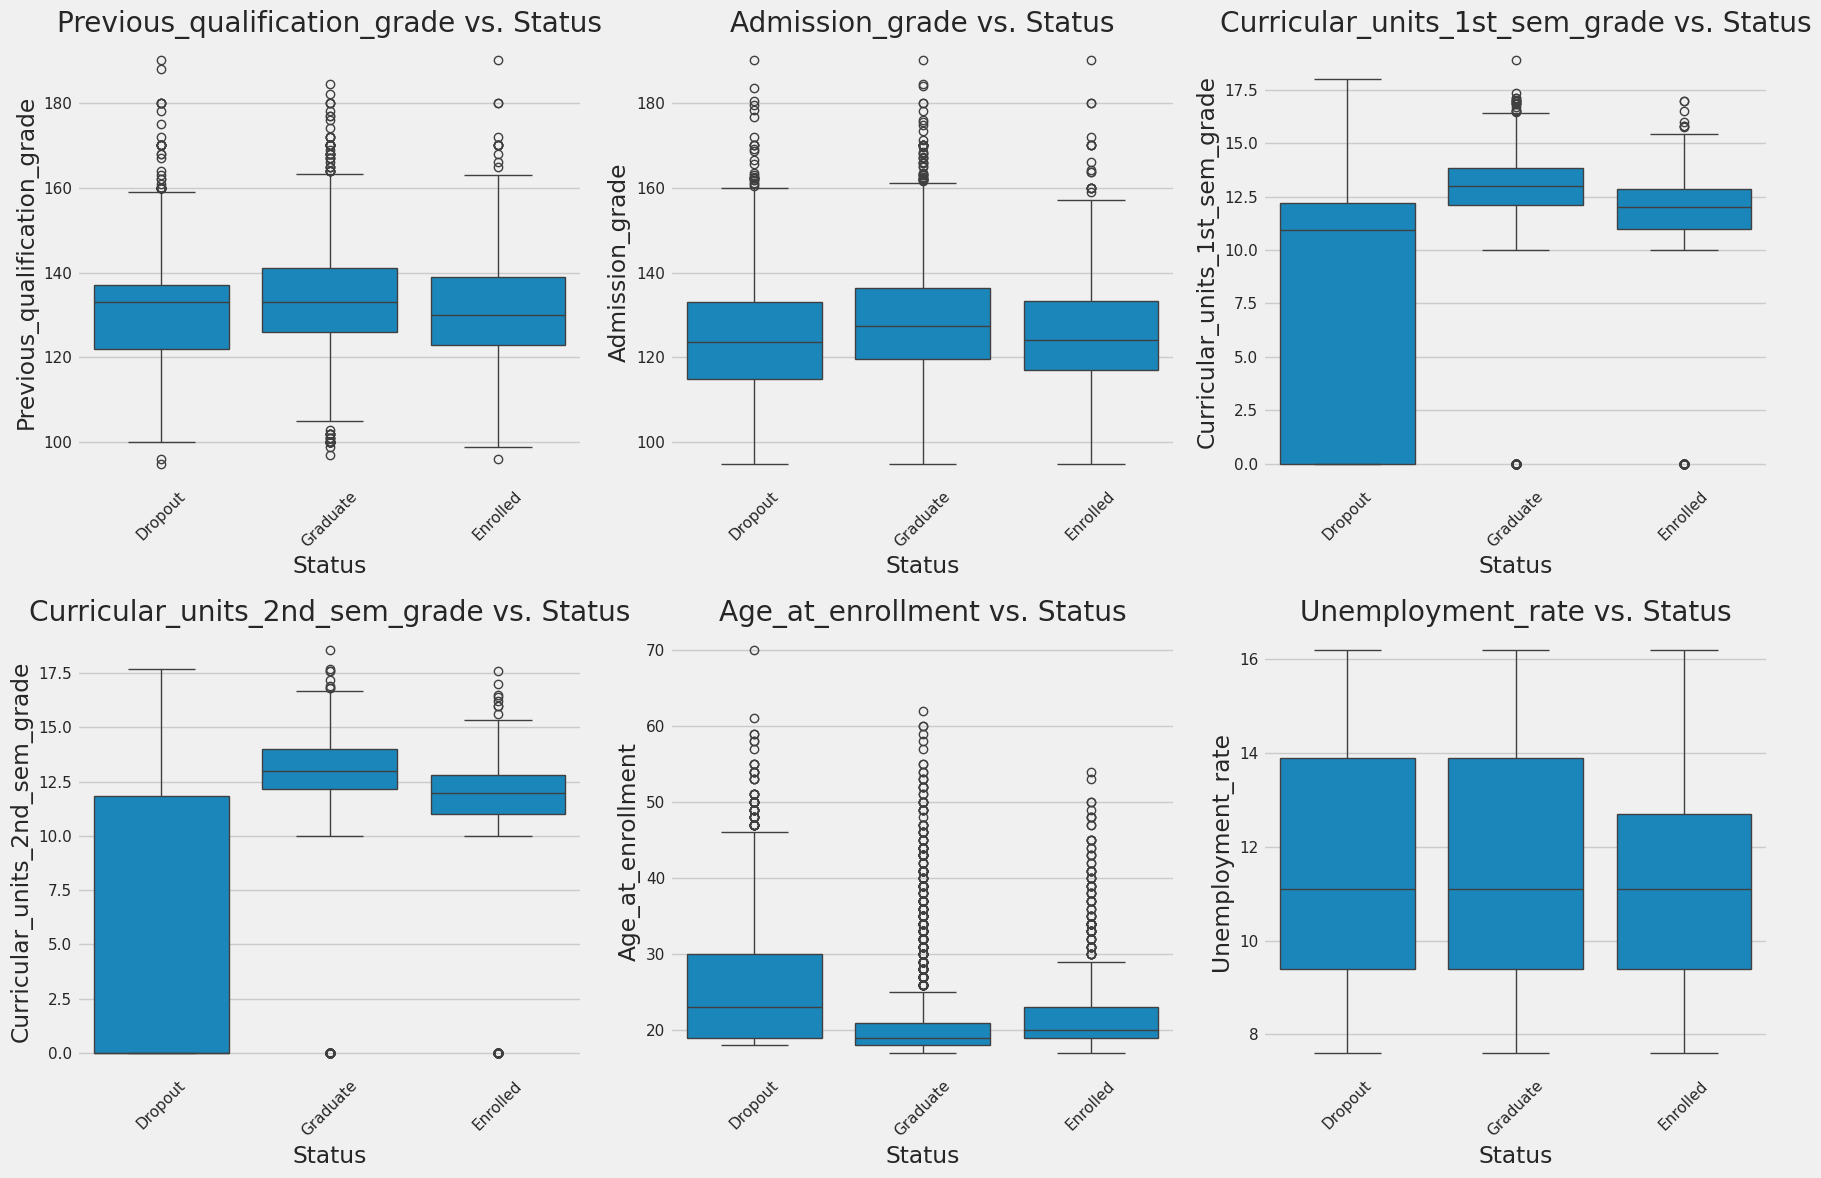

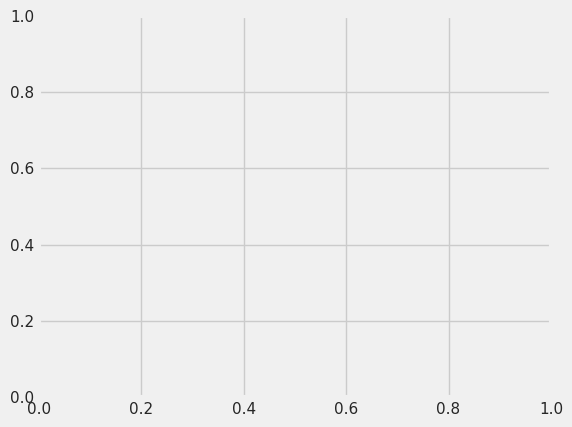

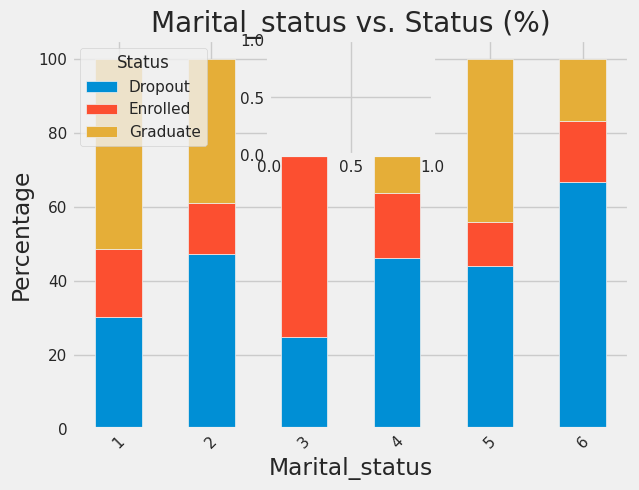

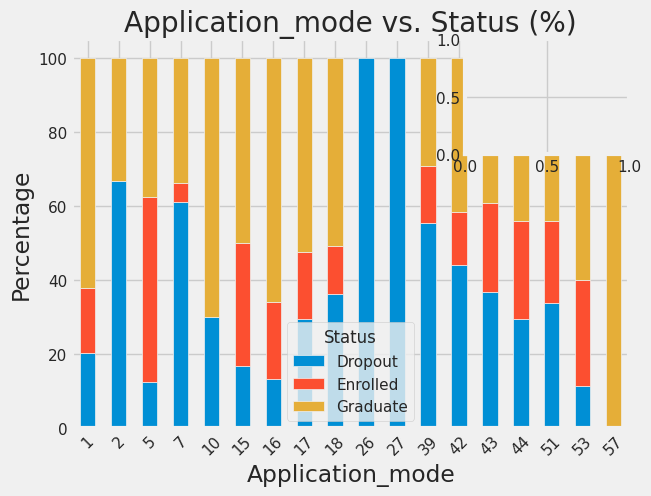

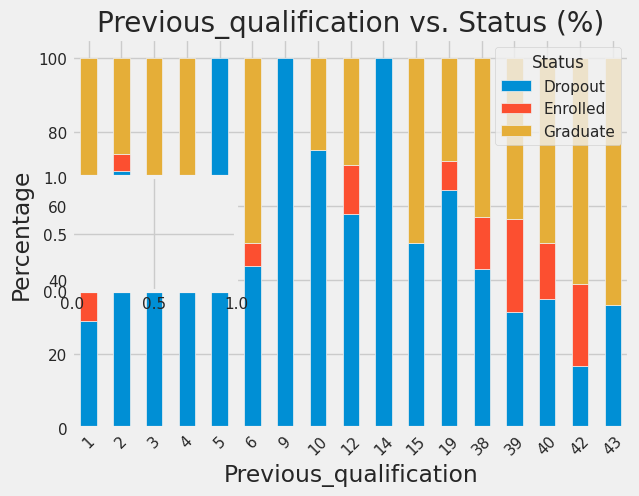

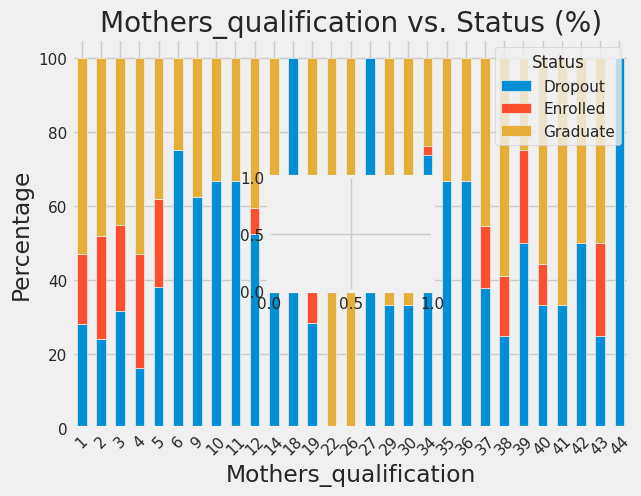

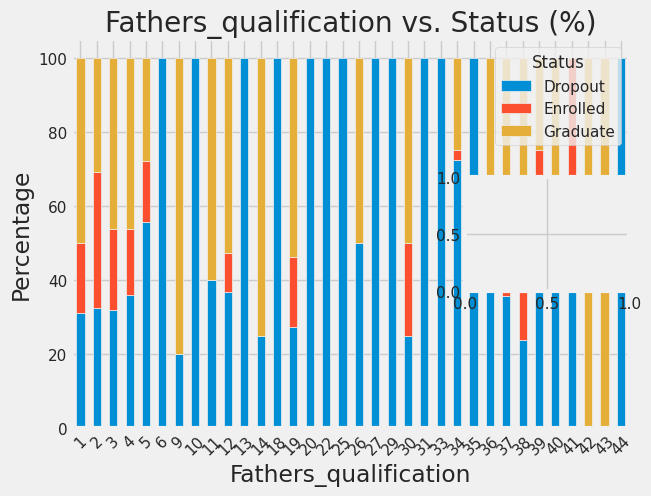

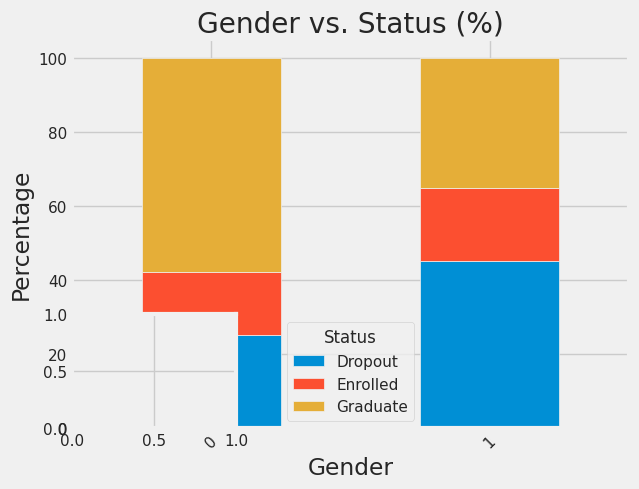

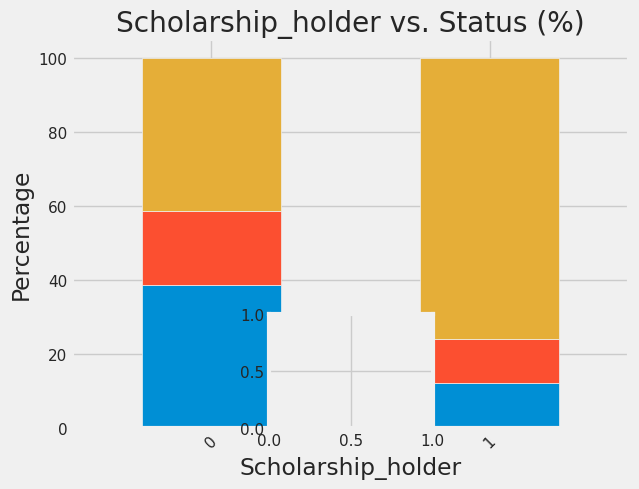

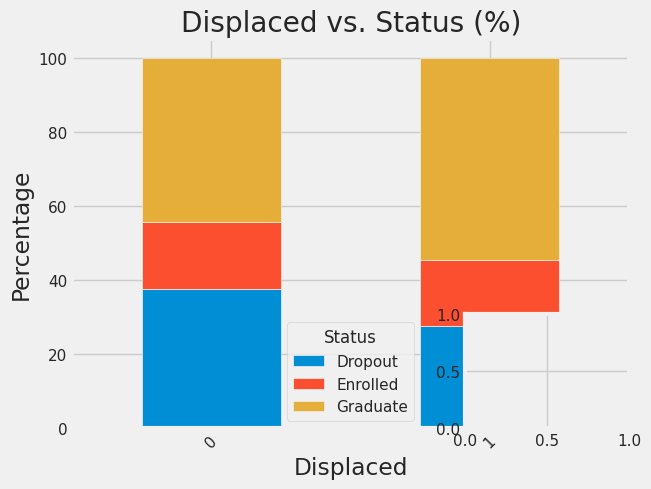

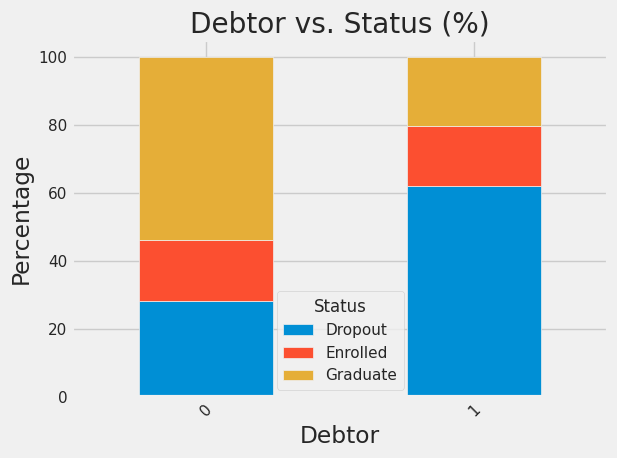

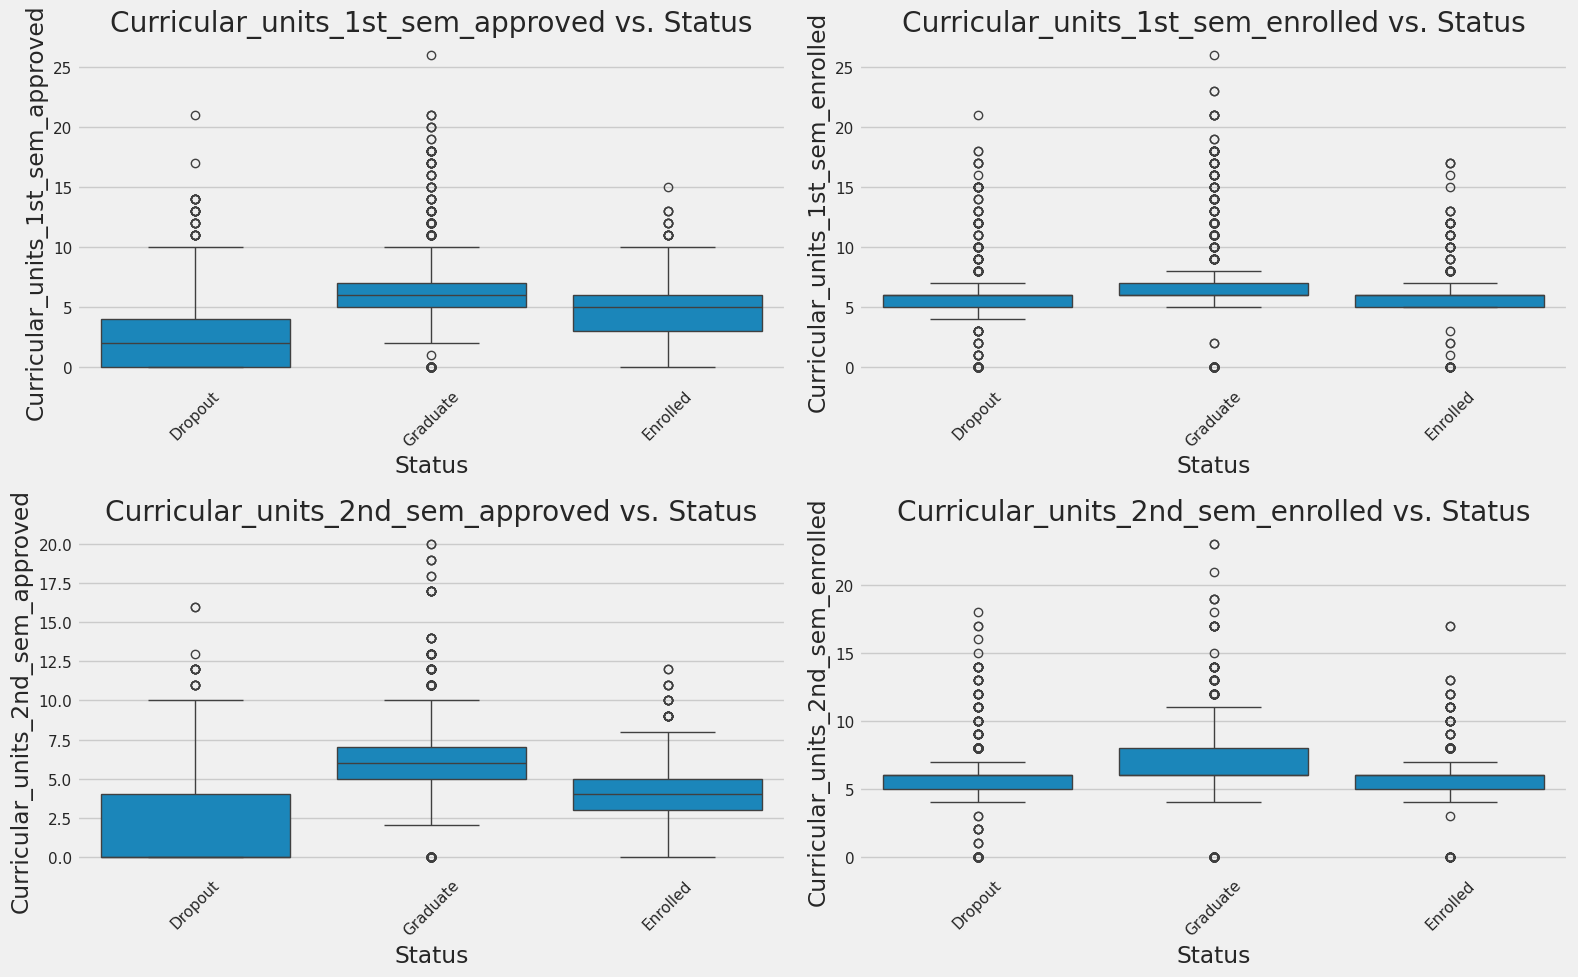

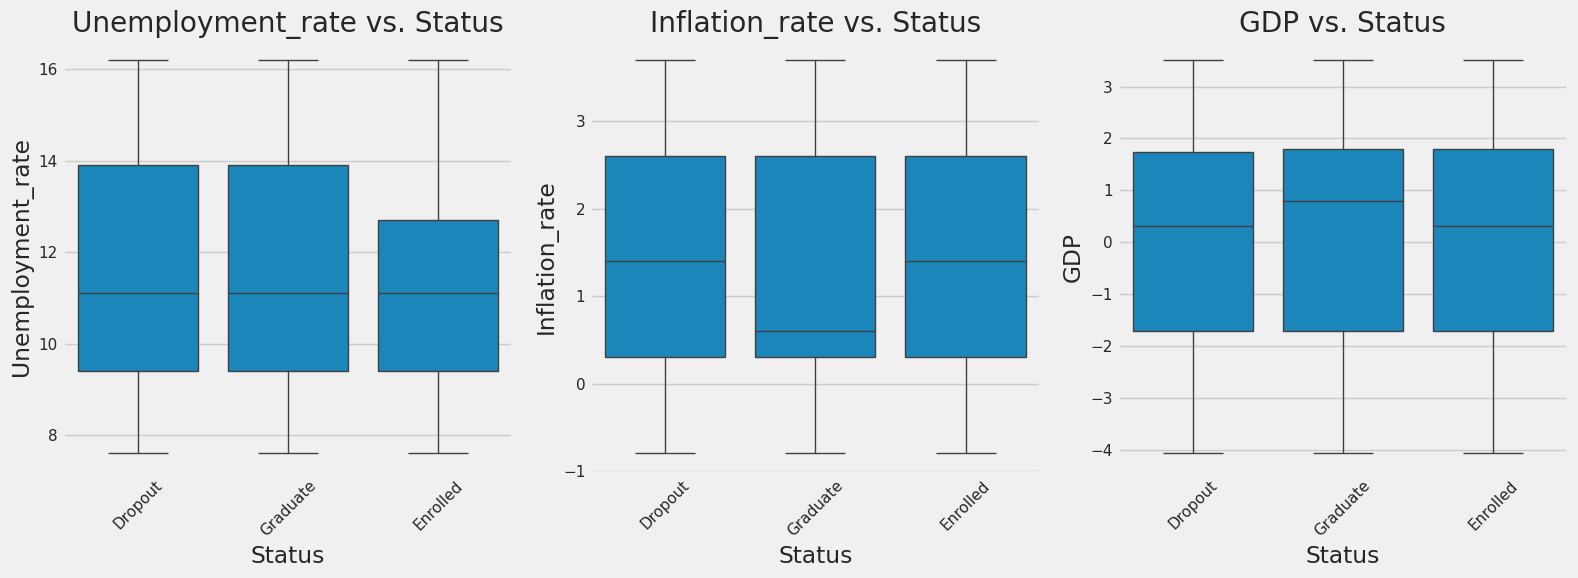

In [7]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
plt.bar(status_counts.index, status_counts.values)
plt.title('Distribution of Student Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPercentage distribution of target variable:")
display((df['Status'].value_counts(normalize=True) * 100).round(2))

# Explore correlations
plt.figure(figsize=(20, 16))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Exploring key features against target variable
important_features = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Age_at_enrollment',
    'Unemployment_rate'
]

plt.figure(figsize=(18, 12))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'{feature} vs. Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Categorical features analysis
categorical_features = ['Marital_status', 'Application_mode', 'Previous_qualification',
                        'Mothers_qualification', 'Fathers_qualification', 'Gender',
                        'Scholarship_holder', 'Displaced', 'Debtor', 'International']

plt.figure(figsize=(20, 16))
for i, feature in enumerate(categorical_features[:9], 1):
    plt.subplot(3, 3, i)
    crosstab = pd.crosstab(df[feature], df['Status'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs. Status (%)')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Academic performance analysis
academic_features = ['Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_enrolled',
                     'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_enrolled']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(academic_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'{feature} vs. Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Economic factors
economic_features = ['Unemployment_rate', 'Inflation_rate', 'GDP']

plt.figure(figsize=(16, 6))
for i, feature in enumerate(economic_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'{feature} vs. Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing


Checking target variable distribution...
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Unique values in Status: ['Dropout' 'Graduate' 'Enrolled']

Numeric features: 36
Categorical features: 0

Train set shape: (3539, 36), Test set shape: (885, 36)

Class distribution in training set:
Status
Graduate    49.9
Dropout     32.1
Enrolled    17.9
Name: proportion, dtype: float64

Class distribution after SMOTE:
Status
Graduate    33.3
Dropout     33.3
Enrolled    33.3
Name: proportion, dtype: float64


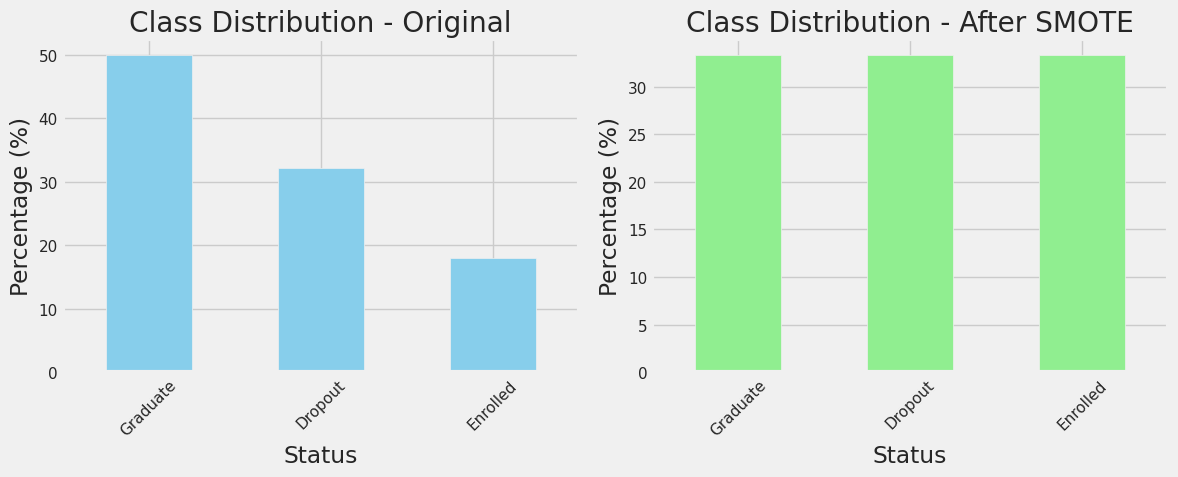

In [8]:
# First, let's check our target variable
print("\nChecking target variable distribution...")
print(df['Status'].value_counts())
print("Unique values in Status:", df['Status'].unique())

# Split features and target (keeping the original Status column)
X = df.drop(['Status'], axis=1)
y = df['Status']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))

# Split the data - stratify by original Status to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(f"\nTrain set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Check for class distribution
print("\nClass distribution in training set:")
class_dist = y_train.value_counts(normalize=True).round(3) * 100
print(class_dist)

# Multi-class handling options:
# 1. Use multi-class classification directly
# 2. Use class weights to handle imbalance
# 3. Use resampling techniques

# Option for resampling with multi-class (uncomment if needed)
from imblearn.over_sampling import SMOTE

# For multi-class, SMOTE can still be applied
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
resampled_dist = pd.Series(y_train_resampled).value_counts(normalize=True).round(3) * 100
print(resampled_dist)

# Visualize class distribution before and after resampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_dist.plot(kind='bar', color='skyblue')
plt.title('Class Distribution - Original')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
resampled_dist.plot(kind='bar', color='lightgreen')
plt.title('Class Distribution - After SMOTE')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Modeling


Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7311
F1 Score (Macro): 0.6900
F1 Score (Weighted): 0.7430
ROC AUC (OvR): 0.8665

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.69      0.76       284
    Enrolled       0.41      0.60      0.49       159
    Graduate       0.84      0.81      0.83       442

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.77      0.73      0.74       885



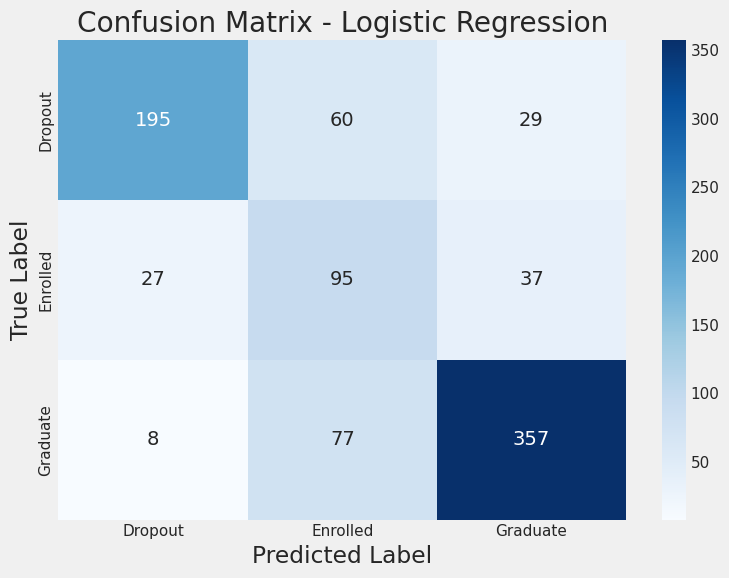


Training Random Forest...

Random Forest Results:
Accuracy: 0.7571
F1 Score (Macro): 0.7082
F1 Score (Weighted): 0.7599
ROC AUC (OvR): 0.8815

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.71      0.77       284
    Enrolled       0.48      0.55      0.51       159
    Graduate       0.83      0.86      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.71      0.71       885
weighted avg       0.77      0.76      0.76       885



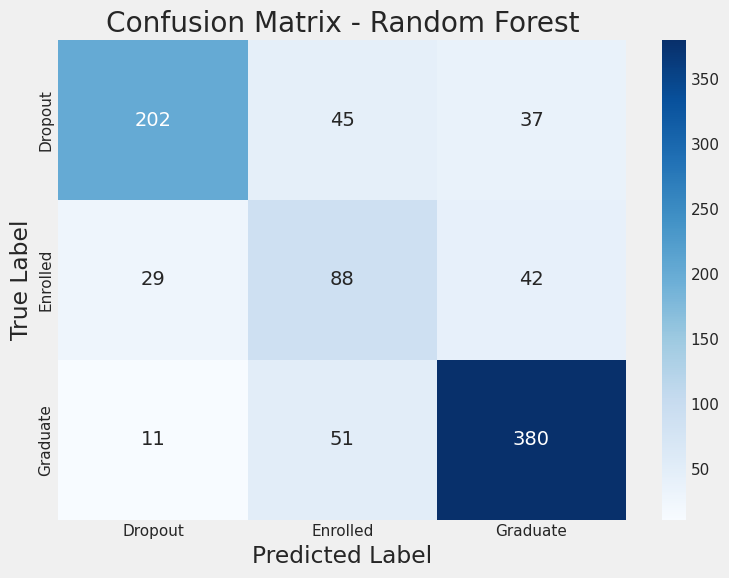


Training Gradient Boosting...

Gradient Boosting Results:
Accuracy: 0.7480
F1 Score (Macro): 0.6955
F1 Score (Weighted): 0.7519
ROC AUC (OvR): 0.8837

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.70      0.75       284
    Enrolled       0.45      0.53      0.49       159
    Graduate       0.84      0.86      0.85       442

    accuracy                           0.75       885
   macro avg       0.70      0.70      0.70       885
weighted avg       0.76      0.75      0.75       885



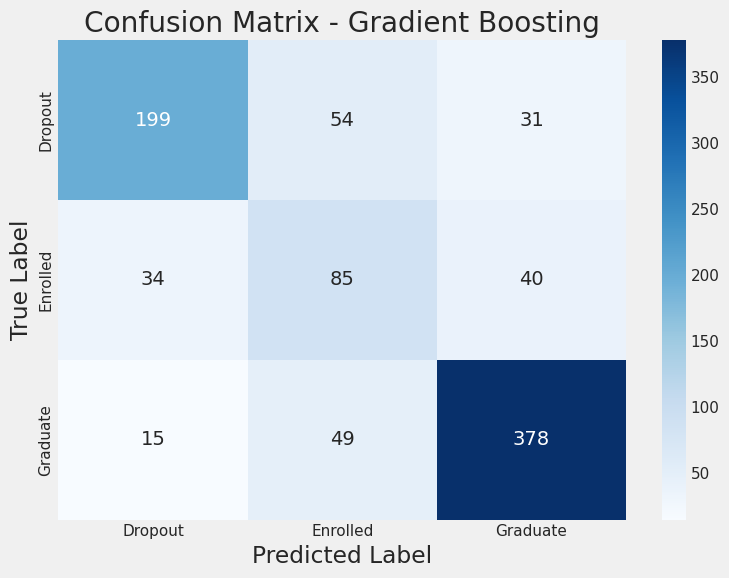


Model Comparison:


,Model,Accuracy,F1 Score (Weighted),ROC AUC
1,Random Forest,0.757062,0.759938,0.881536
2,Gradient Boosting,0.748023,0.751856,0.883739
0,Logistic Regression,0.731073,0.743041,0.866544


<Figure size 1200x600 with 0 Axes>

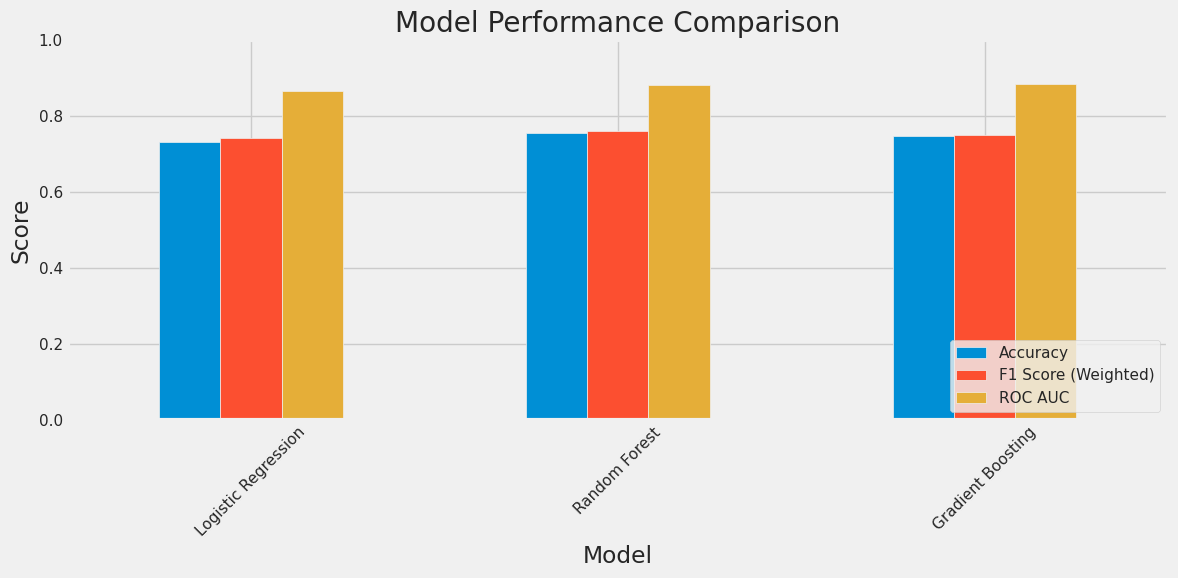

In [9]:
# Function to evaluate multi-class models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # For multi-class, we need to handle probabilities differently
    y_prob = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # For multi-class F1, we use 'macro' or 'weighted' averaging
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    # Multi-class ROC AUC uses OvR (One-vs-Rest) strategy
    try:
        # This will work if your scikit-learn version supports multi-class ROC AUC
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    except:
        # Fallback to calculating it manually with OvR strategy
        # Just report weighted accuracy instead if this fails
        roc_auc = accuracy

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Macro): {f1_macro:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")
    print(f"ROC AUC (OvR): {roc_auc:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix - adapted for multi-class
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)

    # Get class labels for better visualization
    class_labels = model.classes_ if hasattr(model, 'classes_') else model.named_steps['classifier'].classes_

    # Plot confusion matrix with class labels
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return model, accuracy, f1_weighted, roc_auc

# Define models with multi-class compatible parameters
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=SEED, max_iter=1000, multi_class='multinomial', solver='lbfgs'))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=SEED))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=SEED))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model_fitted, accuracy, f1, roc_auc = evaluate_model(
        model, X_train_resampled, y_train_resampled, X_test, y_test, name
    )
    results[name] = {'model': model_fitted, 'accuracy': accuracy, 'f1': f1, 'roc_auc': roc_auc}

# Compare model performances
models_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'F1 Score (Weighted)': [results[model]['f1'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] for model in results]
})

print("\nModel Comparison:")
display(models_df.sort_values('F1 Score (Weighted)', ascending=False))

# Visualize model comparison
plt.figure(figsize=(12, 6))
models_df.set_index('Model')[['Accuracy', 'F1 Score (Weighted)', 'ROC AUC']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Optional: Feature importance for the best model (if it supports it)
best_model_name = models_df.sort_values('F1 Score (Weighted)', ascending=False).iloc[0]['Model']
best_model = results[best_model_name]['model']

## Evaluation

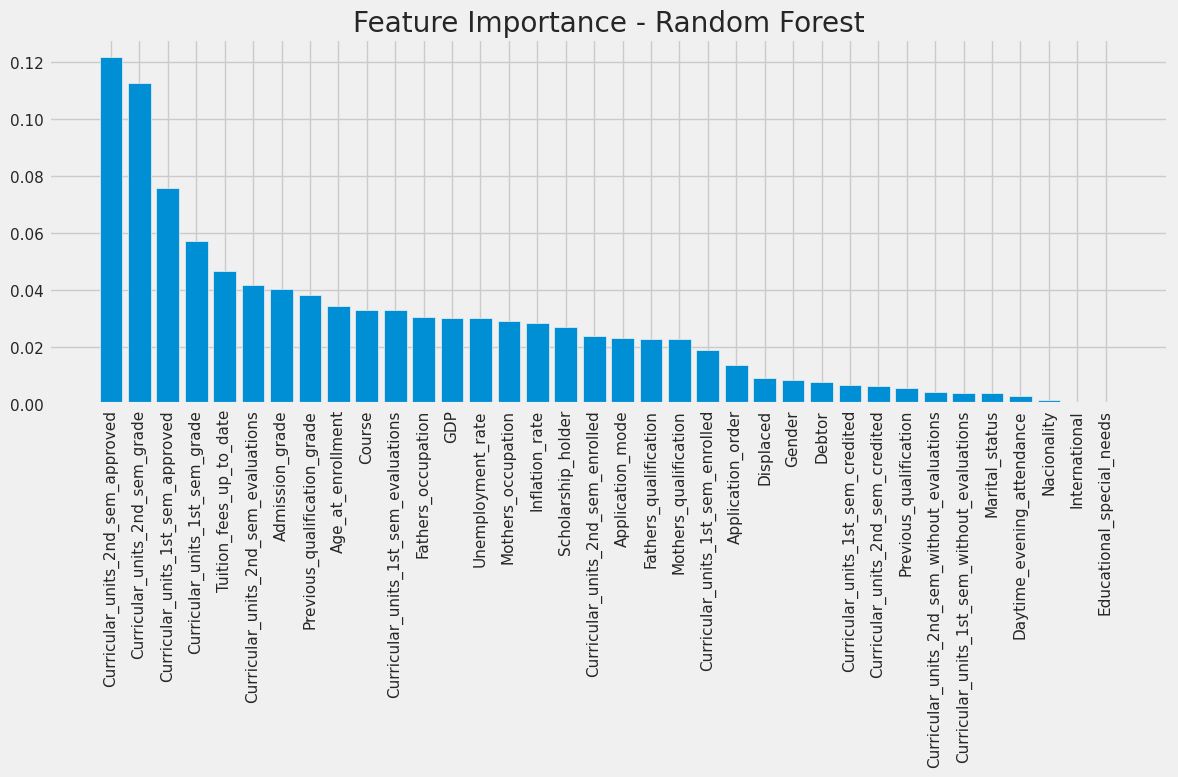


Top 10 important features:
Curricular_units_2nd_sem_approved: 0.1219
Curricular_units_2nd_sem_grade: 0.1125
Curricular_units_1st_sem_approved: 0.0758
Curricular_units_1st_sem_grade: 0.0574
Tuition_fees_up_to_date: 0.0467
Curricular_units_2nd_sem_evaluations: 0.0419
Admission_grade: 0.0403
Previous_qualification_grade: 0.0384
Age_at_enrollment: 0.0344
Course: 0.0331


In [10]:
# Optional: Feature importance for the best model (if it supports it)
best_model_name = models_df.sort_values('F1 Score (Weighted)', ascending=False).iloc[0]['Model']
best_model = results[best_model_name]['model']

# Extract feature names after preprocessing (if possible)
try:
    # Try to get feature names from the pipeline
    if hasattr(best_model, 'named_steps'):
        # For pipeline models
        preprocessor = best_model.named_steps['preprocessor']
        classifier = best_model.named_steps['classifier']

        # Get transformed feature names from the preprocessor
        # This is a bit complex and might need adjustment based on your specific preprocessor
        cat_features = preprocessor.transformers_[1][2]
        num_features = preprocessor.transformers_[0][2]

        # Try to extract one-hot encoded feature names
        try:
            ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
            cat_feature_names = list(ohe.get_feature_names_out(cat_features))
        except:
            # Fallback if we can't get feature names
            cat_feature_names = [f'cat_{i}' for i in range(len(cat_features))]

        # Combine all feature names
        feature_names = list(num_features) + cat_feature_names

        # Extract feature importances if the model supports it
        if hasattr(classifier, 'feature_importances_'):
            # For tree-based models like Random Forest, XGBoost
            importances = classifier.feature_importances_

            # Sort feature importances
            indices = np.argsort(importances)[::-1]

            # Plot feature importance
            plt.figure(figsize=(12, 8))
            plt.title(f'Feature Importance - {best_model_name}')
            plt.bar(range(len(indices)), importances[indices], align='center')
            plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
            plt.tight_layout()
            plt.show()

            # Print top 10 features
            print("\nTop 10 important features:")
            for i in range(min(10, len(indices))):
                print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
except Exception as e:
    print(f"Could not extract feature importance: {e}")
    print("This is normal for some model types or preprocessing configurations.")

In [11]:
# Conclusion and Recommendations

"""
## Kesimpulan dan Rekomendasi

### Kesimpulan
- Model machine learning yang dikembangkan dapat memprediksi mahasiswa yang berisiko dropout dengan performa yang baik.
- Faktor-faktor yang paling berpengaruh dalam memprediksi dropout adalah:
    1. Performa akademik pada semester pertama dan kedua
    2. Biaya akademik
    3. Nilai masuk

### Rekomendasi untuk Jaya Jaya Institut:
1. **Sistem Deteksi Dini**: Implementasikan model ini sebagai sistem peringatan dini untuk mengidentifikasi mahasiswa berisiko dropout sejak awal.
2. **Program Bimbingan Khusus**: Berikan bimbingan akademik khusus untuk mahasiswa yang diidentifikasi berisiko tinggi.
3. **Peningkatan Dukungan**: Tingkatkan dukungan akademik, keuangan, dan sosial untuk mahasiswa berisiko.
4. **Monitoring Berkelanjutan**: Pantau secara berkelanjutan performa mahasiswa, terutama pada faktor-faktor penting penentu dropout.
5. **Evaluasi Kurikulum**: Evaluasi dan sesuaikan kurikulum untuk mata kuliah dengan tingkat kegagalan tinggi.

### Langkah Selanjutnya:
1. Validasi model dengan data terbaru
2. Mengembangkan dashboard interaktif untuk memudahkan monitoring
3. Integrasi dengan sistem akademik yang ada
4. Pelatihan staf akademik untuk menggunakan insight dari model ini
"""

# Save the best model (in actual implementation)
# Define filename for the best model
best_model_filename = f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl"

# Save the best model (pipeline including preprocessor and classifier)
joblib.dump(best_model, best_model_filename)

print(f"Best model saved as: {best_model_filename}")
print("\nAnalysis complete!")

Best model saved as: random_forest_best_model.pkl

Analysis complete!
